<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/KNN_DT_RF_XGB_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Setting random seed

In [2]:
random.seed(25)
np.random.seed(25)


# Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
data_path = '/content/drive/MyDrive/imbalanced_heart_data_q5.csv'
heart_data = pd.read_csv(data_path)

# TODO: Explore the dataset

## TODO: Print basic information

In [5]:
# Load Basic information
heart_data.info()

heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       549 non-null    int64  
 1   ca       549 non-null    int64  
 2   thalach  549 non-null    int64  
 3   oldpeak  549 non-null    float64
 4   thal     549 non-null    int64  
 5   target   549 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 25.9 KB


,cp,ca,thalach,oldpeak,thal,target
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.561020,1.078324,140.845173,1.492532,2.504554,0.094718
std,0.942901,1.039048,23.077379,1.288169,0.685138,0.293092
min,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,125.000000,0.300000,2.000000,0.000000
50%,0.000000,1.000000,143.000000,1.200000,3.000000,0.000000
75%,1.000000,2.000000,160.000000,2.400000,3.000000,0.000000
max,3.000000,4.000000,195.000000,6.200000,3.000000,1.000000


## TODO: Print the distribution of target variable

In [6]:
value_counts = heart_data['target'].value_counts()

proportions = value_counts / len(heart_data)

print("Proportion of each unique value in the 'target' column in %:")
print(proportions * 100)

Proportion of each unique value in the 'target' column in %:
target
0    90.528233
1     9.471767
Name: count, dtype: float64


**Question**: Is the dataset imbalanced?

**Answer**: Yes, the dataset appears imbalanced because the proportion of value 0 (90.5%) is much higher than value 1 (9.5%)

## TODO: Plot histograms of numerical attributes

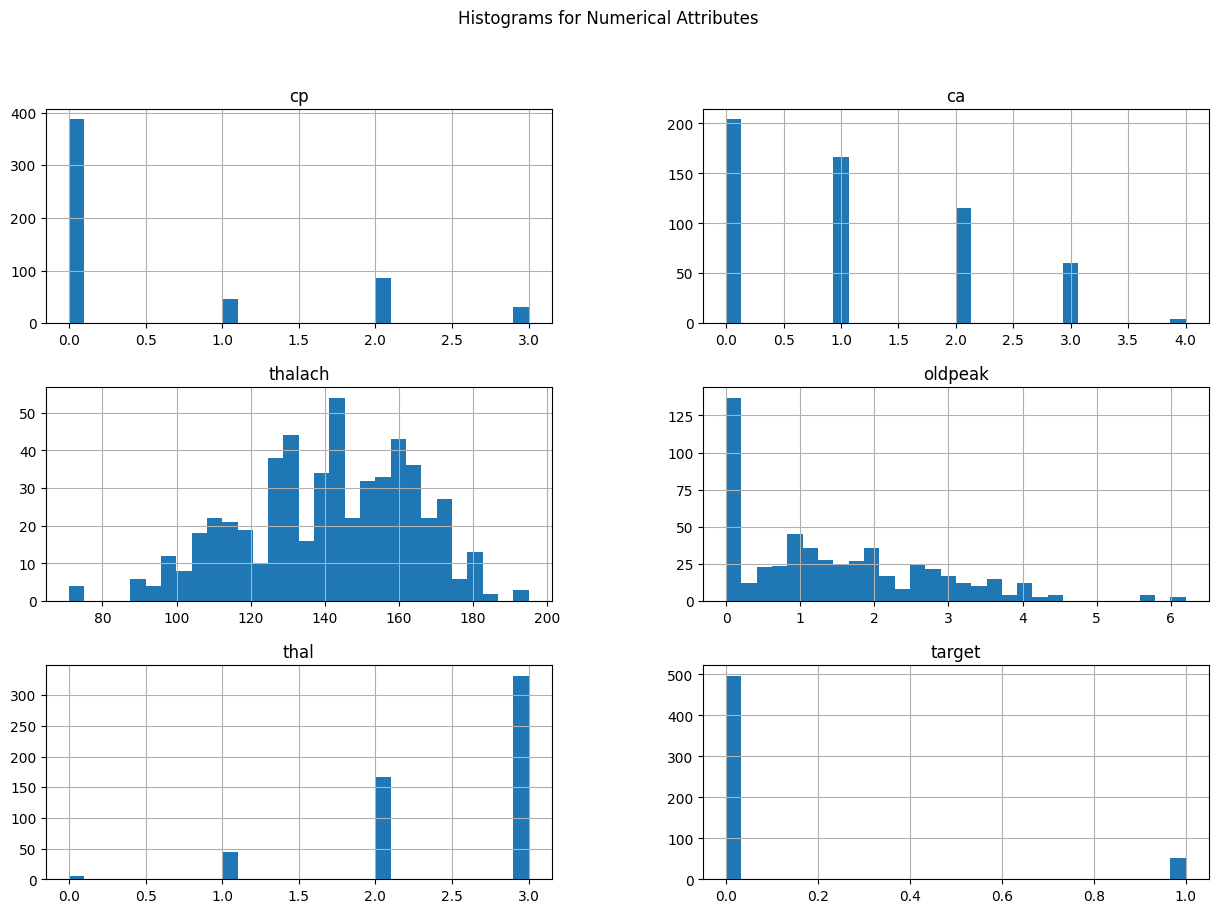

cp         1.369990
ca         0.587301
thalach   -0.327264
oldpeak    0.790790
thal      -1.212341
target     2.775679
dtype: float64

Skewed Features:
 cp         1.369990
ca         0.587301
oldpeak    0.790790
thal      -1.212341
target     2.775679
dtype: float64


In [7]:
#select numerical columns
numerical_cols = heart_data.select_dtypes(include=['number']).columns

# Plotting histograms for numerical attributes
heart_data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Attributes')
plt.show()

#checking skewness
skewness = heart_data[numerical_cols].skew()
threshold = 0.5
skewed_features = skewness[abs(skewness) > threshold]
print(skewness)
print("\nSkewed Features:\n", skewed_features)

**Question:** Which of the features are skewed? Also, mention if they are left-skewed or right-skewed

**Answer:**
**cp, ca, oldpeak & target** are **right-skewe**d
while **thal** is **left-skewed**

## TODO: Visualise the correlation matrix

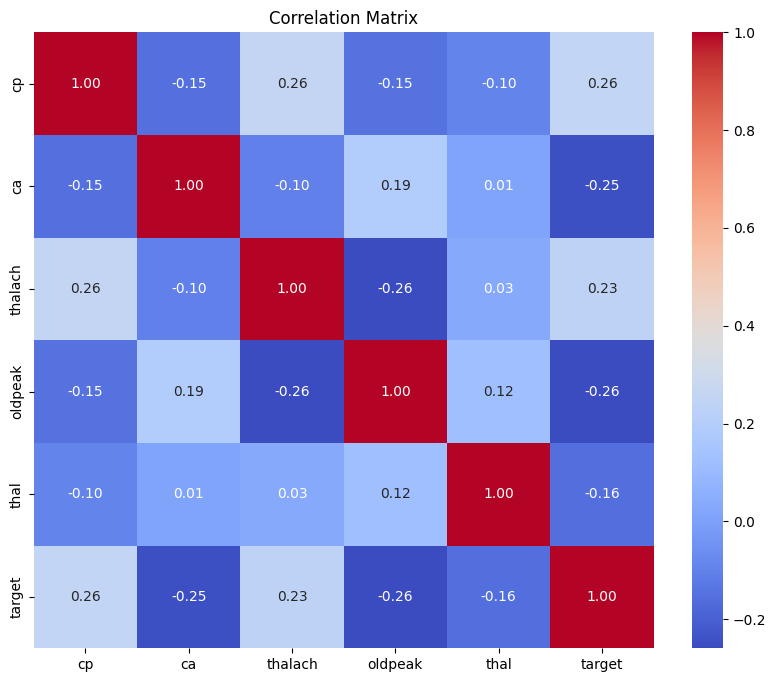

Correlations with the Target Variable:
 cp         0.256380
ca        -0.246113
thalach    0.233654
oldpeak   -0.259604
thal      -0.156637
target     1.000000
Name: target, dtype: float64


In [8]:
# Correlation matrix
correlation_matrix = heart_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

target_correlation = correlation_matrix['target']
print("Correlations with the Target Variable:\n", target_correlation)

**Question**: Is there a high correlation with features or with the target variable

**Answer**: There are no very high correlations (greater than ±0.7) either among the features themselves or between the features and the target variable. The moderate correlations (around ±0.25) with the target variable can be considered potentially important for predictive modeling but are not strong enough to indicate redundancy among the features.

# TODO: Scale the features

In [9]:
# Scaling features
target_column = heart_data['target']
features = heart_data.drop(columns=['target'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert Scaled Data back into DataFrame
scaled_heart_data = pd.DataFrame(scaled_features, columns=features.columns)


**Question**: Why is this step important?

**Answer**: Since the target variable represents the outcome or response variable that we are trying to predict, separating the target column before scaling is important so that the information from the target variable doesn't affect the training process.

In [10]:
#Report the mean and standard deviation of the scaled features
print("Mean of Scaled Features:\n", scaled_heart_data.mean())
print("\nStandard Deviation of Scaled Features:\n", scaled_heart_data.std())

Mean of Scaled Features:
 cp         2.912060e-17
ca        -2.264936e-17
thalach   -1.132468e-16
oldpeak    9.059743e-17
thal      -6.471245e-17
dtype: float64

Standard Deviation of Scaled Features:
 cp         1.000912
ca         1.000912
thalach    1.000912
oldpeak    1.000912
thal       1.000912
dtype: float64


# TODO: Create the training and testing datasets

In [11]:
# create training and testing dataset
X = scaled_heart_data
y = target_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=25)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (439, 5)
Shape of X_test: (110, 5)
Shape of y_train: (439,)
Shape of y_test: (110,)


# TODO: Train all the models

In [12]:
models = {
    "KNN_Set1": KNeighborsClassifier(n_neighbors=3, weights='uniform'),
    "KNN_Set2": KNeighborsClassifier(n_neighbors=10, weights='uniform', p=2),
    "KNN_Set3": KNeighborsClassifier(n_neighbors=15, weights='distance', p=1),
    "DecisionTree_Set1": DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=25),
    "DecisionTree_Set2": DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=25),
    "DecisionTree_Set3": DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, random_state=25),
    "RandomForest_Set1": RandomForestClassifier(n_estimators=50, max_features='auto', random_state=25),
    "RandomForest_Set2": RandomForestClassifier(n_estimators=200, max_depth=10, max_features='log2', random_state=25),
    "RandomForest_Set3": RandomForestClassifier(n_estimators=350, max_depth=20, min_samples_split=3, random_state=25),
    "XGBoost_Set1": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50, random_state=25),
    "XGBoost_Set2": XGBClassifier(learning_rate=0.15, max_depth=10, n_estimators=150, random_state=25),
    "XGBoost_Set3": XGBClassifier(learning_rate=0.25, max_depth=15, n_estimators=250, random_state=25)
}

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictiong training data
    y_train_pred = model.predict(X_train)

    # Predicting testing data
    y_test_pred = model.predict(X_test)

    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Confusion matrices
    train_confusion = confusion_matrix(y_train, y_train_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)

    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("Training Confusion Matrix:")
    print(train_confusion)
    print("Testing Confusion Matrix:")
    print(test_confusion)
    print("\n")


Model: KNN_Set1
Training Accuracy: 0.9749
Testing Accuracy: 0.9455
Training Confusion Matrix:
[[397   0]
 [ 11  31]]
Testing Confusion Matrix:
[[100   0]
 [  6   4]]


Model: KNN_Set2
Training Accuracy: 0.9339
Testing Accuracy: 0.9455
Training Confusion Matrix:
[[397   0]
 [ 29  13]]
Testing Confusion Matrix:
[[100   0]
 [  6   4]]


Model: KNN_Set3
Training Accuracy: 0.9954
Testing Accuracy: 0.9455
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [  6   4]]


Model: DecisionTree_Set1
Training Accuracy: 0.9339
Testing Accuracy: 0.9091
Training Confusion Matrix:
[[391   6]
 [ 23  19]]
Testing Confusion Matrix:
[[96  4]
 [ 6  4]]


Model: DecisionTree_Set2
Training Accuracy: 0.9818
Testing Accuracy: 0.9455
Training Confusion Matrix:
[[397   0]
 [  8  34]]
Testing Confusion Matrix:
[[100   0]
 [  6   4]]


Model: DecisionTree_Set3
Training Accuracy: 0.9590
Testing Accuracy: 0.9182
Training Confusion Matrix:
[[393   4]
 [ 14  28]]
Testing Confusion Ma

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model: RandomForest_Set1
Training Accuracy: 0.9954
Testing Accuracy: 0.9545
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [  5   5]]


Model: RandomForest_Set2
Training Accuracy: 0.9954
Testing Accuracy: 0.9545
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [  5   5]]


Model: RandomForest_Set3
Training Accuracy: 0.9954
Testing Accuracy: 0.9545
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [  5   5]]


Model: XGBoost_Set1
Training Accuracy: 0.9043
Testing Accuracy: 0.9091
Training Confusion Matrix:
[[397   0]
 [ 42   0]]
Testing Confusion Matrix:
[[100   0]
 [ 10   0]]


Model: XGBoost_Set2
Training Accuracy: 0.9954
Testing Accuracy: 0.9636
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Testing Confusion Matrix:
[[100   0]
 [  4   6]]


Model: XGBoost_Set3
Training Accuracy: 0.9954
Testing Accuracy: 0.9636
Training Confusion Matrix:
[[397   0]
 [  2  40]]
Test

Additional Insights:

**KNN_Set1** : This model has high training and testing accuracy, suggesting it generalizes well. The confusion matrices indicate good performance but with some misclassifications of the minority class (class 1)

**KNN_Set2** : Slightly lower training accuracy compared to KNN_Set1, but same testing accuracy. It misclassifies more samples in the training set compared to KNN_Set1.

**KNN_Set3** : Very high training accuracy, indicating potential overfitting. Testing accuracy remains the same, but it performs slightly better on the minority class in the training set

**DecisionTree_Set1** : Moderate performance with reasonable training accuracy and slightly lower testing accuracy. Shows some misclassification, indicating it may not be capturing all patterns in the data.

**DecisionTree_Set2** : Higher training accuracy, improved performance on the minority class compared to Set1. Testing accuracy is good, but still misclassifies some minority class samples.

**DecisionTree_Set3** : High training accuracy, indicating potential overfitting. Testing accuracy is lower, with misclassifications in both classes.

**RandomForest_Set1** : Excellent performance with high training and testing accuracy. Balanced performance on minority class, showing robustness.

**RandomForest_Set2** : Similar to Set1, excellent performance with high accuracy and balanced confusion matrix.

**RandomForest_Set3** : Similar to Set1 and Set2, showing robustness across different hyperparameters.

**XGBoost_Set1** : Lower accuracy, particularly struggles with the minority class, indicating poor performance.

**XGBoost_Set2** : Excellent performance with high accuracy and better handling of the minority class compared to Set1.

**XGBoost_Set3** : Similar to Set2, excellent performance and robustness across different hyperparameters.

In summary, **XGBoost_Set2** and **XGBoost_Set3** both have the highest testing accuracy (0.9636) and good performance on the minority class and **RandomForest_Set1**, **Set2**, and **Set3** all have high testing accuracy (0.9545) and balanced performance, indicating robustness. Contrastly, **XGBoost_Set1** has Low accuracy and poor handling of the minority class while **DecisionTree_Set1** and **Set3** have lower testing accuracy and misclassifications. **KNN_Set3**, **DecisionTree_Set2** might suggest potential overfitting because they shows very high training accuracy but slightly lower testing accuracy.

**Question 5.8**: What are the potential challenges that exist with working with real-world healthcare data for machine learning applications?

**Answer**: Healthcare data is high-dimensional (with large number of features) and multimodal (in different forms). This complicates data integration and processing. Annotating such complex data, especially medical images, requires expert domain knowledge and is often time-consuming and costly.

In addition, biases might also exist in data collection, say for example, data from healthy people and unhealthy conduction the same test, or people who have genetic advantages over those who don't. These biases can lead to unfair and inaccurate models.

Lastly, publicly accessing healthcare data might pose a problem, since patient-doctor confidentiality is key. Healthcare data are not readily available for unauthorized ML enthusiasts to train and test.